<a href="https://colab.research.google.com/github/Stephanielfriede/Mini-Project-Data-Mining/blob/main/2209116037_Stephanie_E_G_Mini_Project_Data_Mining_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Analisis Faktor-Faktor yang Mempengaruhi Penjualan Manga Best Seller**

#**Import Library**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from scipy.stats import pearsonr

#**BUSINESS UNDERSTANDING**

##**Business Objective**

Tujuan utama dari proyek ini adalah untuk mencari tahu mengapa beberapa manga menjadi sangat laris di pasaran. Dan ingin mengetahui faktor-faktor apa yang membuat manga tersebut sukses dalam penjualannya. Hal-hal tersebut penting agar penerbit, penulis, dan pembaca dapat memahami lebih baik tentang apa yang membuat manga menjadi populer dan bagaimana faktor-faktor tersebut mempengaruhi kesuksesan penjualannya.


##**Assess Situation**

Saat ini, manga sedang sangat populer dan memiliki banyak penggemar di seluruh dunia. Dengan meningkatnya minat terhadap manga, penting untuk memahami mengapa beberapa manga menjadi best seller sementara yang lain tidak. Beberapa faktor yang mungkin mempengaruhi penjualan manga adalah jenis ceritanya, gaya seni, dan cara promosinya. Namun, tidak semua manga bisa mencapai tingkat penjualan yang tinggi, jadi kita perlu mencari tahu apa yang membedakan manga best seller dari yang lain.


##**Data Mining Goals**

Tujuan dari tahap ini adalah untuk menganalisis data penjualan manga best seller dan mencari pola-pola yang mungkin tersembunyi di dalamnya. Kita ingin mengetahui apakah ada hubungan antara faktor-faktor seperti jenis cerita, penerbit, atau demografi pembacanya dengan kesuksesan penjualan manga. Informasi ini akan membantu kita memberikan saran kepada penerbit manga atau penulis untuk meningkatkan penjualan manga mereka.


##**Project Plan**

Proyek ini dimulai dengan mengumpulkan informasi lengkap tentang manga terlaris, termasuk judul, penulis, penerbit, jenis pembaca, jumlah buku, tanggal rilis, dan jumlah penjualan. Langkah berikutnya melibatkan penyusunan data untuk analisis dengan tujuan mengidentifikasi pola umum dan hubungan antar variabel. Analisis data kemudian dilakukan untuk mengungkap faktor-faktor yang berpotensi memengaruhi penjualan menggunakan teknik khusus. Selanjutnya, evaluasi dilakukan terhadap model-model yang dibuat untuk menilai seberapa baik kemampuannya dalam memprediksi penjualan manga.

#**DATA UNDERSTANDING**

##**Collect Initial Data**

Data yang digunakan diambil dari Kaggle dengan judul dataset "Best Selling Manga" [Best Selling Manga Dataset](https://www.kaggle.com/datasets/drahulsingh/best-selling-manga).

In [ ]:
df = 'https://raw.githubusercontent.com/Stephanielfriede/Mini-Project-Data-Mining/main/best-selling-manga.csv'
df_file = pd.read_csv(df)
df_file

,Manga series,Author(s),Publisher,Demographic,No. of collected volumes,Serialized,Approximate sales in million(s),Average sales per volume in million(s)
0,One Piece,Eiichiro Oda,Shueisha,Shōnen,104,1997–present,516.6,4.97
1,Golgo 13,"Takao Saito, Saito Production",Shogakukan,Seinen,207,1968–present,300.0,1.45
2,Case Closed / Detective Conan,Gosho Aoyama,Shogakukan,Shōnen,102,1994–present,270.0,2.65
3,Dragon Ball,Akira Toriyama,Shueisha,Shōnen,42,1984–1995,260.0,6.19
4,Doraemon,Fujiko F. Fujio,Shogakukan,Children,45,1969–1996,250.0,4.71
...,...,...,...,...,...,...,...,...
182,Sukeban Deka,Shinji Wada,Hakusensha,Shōjo,22,1976–1982,20.0,0.90
183,Swan,Kyoko Ariyoshi,Shueisha,Shōjo,21,1976–1981,20.0,0.95
184,The Tale of Genji,Waki Yamato,Kodansha,Shōjo,13,1980–1993,20.0,1.53
185,Tokyo Daigaku Monogatari,Tatsuya Egawa,Shogakukan,Seinen,34,1992–2001,20.0,0.58


##**Describe Data**

####Informasi Dasar

In [ ]:
print("Jumlah baris dalam dataset:", df_file.shape[0])
print("Jumlah kolom dalam dataset:", df_file.shape[1])

Jumlah baris dalam dataset: 187
Jumlah kolom dalam dataset: 8


Jumlah baris dalam dataset ini adalah 187, yang berarti terdapat 187 data yang tersedia untuk dianalisis. Sedangkan jumlah kolomnya adalah 8, yang menunjukkan bahwa data tersebut memiliki 8 jenis informasi yang berbeda yang tercatat.

####Informasi Lanjutan

In [ ]:
df_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Manga series                            187 non-null    object 
 1   Author(s)                               187 non-null    object 
 2   Publisher                               187 non-null    object 
 3   Demographic                             187 non-null    object 
 4   No. of collected volumes                187 non-null    int64  
 5   Serialized                              187 non-null    object 
 6   Approximate sales in million(s)         187 non-null    float64
 7   Average sales per volume in million(s)  187 non-null    float64
dtypes: float64(2), int64(1), object(5)
memory usage: 11.8+ KB


1. Manga series: Kolom ini berisi nama-nama seri manga. Terdapat 187 baris dalam kolom ini. Tipe data dari kolom ini adalah `object`, yang menunjukkan bahwa data dalam kolom ini adalah teks atau string.

2. Author(s): Kolom ini berisi nama-nama penulis atau penulis dari manga-manga tersebut. Terdapat 187 baris dalam kolom ini. Tipe data dari kolom ini juga `object`, menunjukkan bahwa data dalam kolom ini juga berupa teks atau string.

3. Publisher: Kolom ini berisi nama-nama penerbit manga. Terdapat 187 baris dalam kolom ini. Tipe data dari kolom ini juga `object`.

4. Demographic: Kolom ini menunjukkan demografi target pembaca manga tersebut. Terdapat 187 baris dalam kolom ini. Tipe data dari kolom ini juga `object`.

5. No. of collected volumes: Kolom ini menunjukkan jumlah volume manga yang telah terbit. Terdapat 187 baris dalam kolom ini. Tipe data dari kolom ini adalah `int64`, yang menunjukkan bahwa data dalam kolom ini adalah bilangan bulat.

6. Serialized: Kolom ini menunjukkan informasi bahwa manga tersebut diterbitkan secara bertahap dalam bagian-bagian cerita yang berlanjut dari waktu ke waktu. Terdapat 187 baris dalam kolom ini. Tipe data dari kolom ini adalah `object`.

7. Approximate sales in million(s): Kolom ini menunjukkan perkiraan penjualan manga dalam jutaan unit. Terdapat 187 baris dalam kolom ini. Tipe data dari kolom ini adalah `float64`, yang menunjukkan bahwa data dalam kolom ini adalah bilangan pecahan.

8. Average sales per volume in million(s): Kolom ini menunjukkan perkiraan rata-rata penjualan per volume manga dalam jutaan unit. Terdapat 187 baris dalam kolom ini. Tipe data dari kolom ini juga `float64`.

####Informasi Statistik Deskriptif

In [ ]:
df_file.describe()

,No. of collected volumes,Approximate sales in million(s),Average sales per volume in million(s)
count,187.000000,187.000000,187.000000
mean,46.048128,50.764332,1.377380
std,34.678288,57.178028,1.240013
min,5.000000,20.000000,0.190000
25%,23.500000,24.500000,0.670000
50%,34.000000,31.000000,1.030000
75%,56.500000,50.500000,1.650000
max,207.000000,516.600000,10.000000


1. No. of collected volumes:
   - `count`: Jumlah data yang tidak null dalam kolom tersebut adalah 187.
   - `mean`: Rata-rata jumlah volume manga yang telah terkumpul adalah sekitar 46.05.
   - `std`: Standar deviasi dari jumlah volume manga yang telah terkumpul adalah sekitar 34.68.
   - `min`: Jumlah volume manga terendah yang telah terkumpul adalah 5.
   - `25%`: Kuartil pertama dari jumlah volume manga yang telah terkumpul adalah 23.5.
   - `50%`: Median dari jumlah volume manga yang telah terkumpul adalah 34.
   - `75%`: Kuartil ketiga dari jumlah volume manga yang telah terkumpul adalah 56.5.
   - `max`: Jumlah volume manga tertinggi yang telah terkumpul adalah 207.

2. Approximate sales in million(s):
   - `count`: Jumlah data yang tidak null dalam kolom tersebut adalah 187.
   - `mean`: Rata-rata penjualan manga dalam jutaan unit adalah sekitar 50.76.
   - `std`: Standar deviasi dari penjualan manga dalam jutaan unit adalah sekitar 57.18.
   - `min`: Penjualan manga terendah dalam jutaan unit adalah 20.
   - `25%`: Kuartil pertama dari penjualan manga dalam jutaan unit adalah 24.5.
   - `50%`: Median dari penjualan manga dalam jutaan unit adalah 31.
   - `75%`: Kuartil ketiga dari penjualan manga dalam jutaan unit adalah 50.5.
   - `max`: Penjualan manga tertinggi dalam jutaan unit adalah 516.6.

3. Average sales per volume in million(s):
   - `count`: Jumlah data yang tidak null dalam kolom tersebut adalah 187.
   - `mean`: Rata-rata penjualan per volume manga dalam jutaan unit adalah sekitar 1.38.
   - `std`: Standar deviasi dari penjualan per volume manga dalam jutaan unit adalah sekitar 1.24.
   - `min`: Penjualan per volume manga terendah dalam jutaan unit adalah 0.19.
   - `25%`: Kuartil pertama dari penjualan per volume manga dalam jutaan unit adalah 0.67.
   - `50%`: Median dari penjualan per volume manga dalam jutaan unit adalah 1.03.
   - `75%`: Kuartil ketiga dari penjualan per volume manga dalam jutaan unit adalah 1.65.
   - `max`: Penjualan per volume manga tertinggi dalam jutaan unit adalah 10.

##**Exploratory Data Analysis**

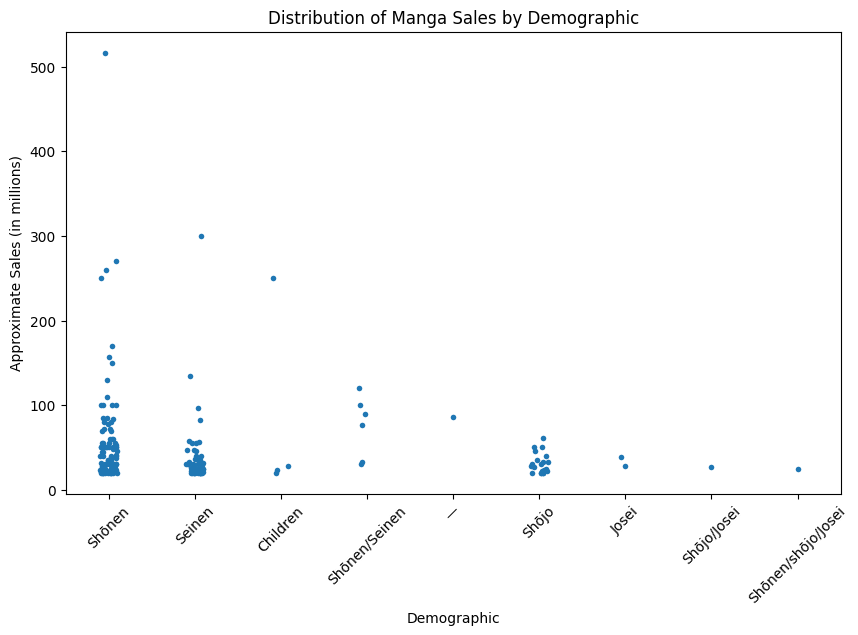

In [ ]:
#Distribusi Penjualan Manga berdasarkan Demografis
plt.figure(figsize=(10, 6))
sns.stripplot(x='Demographic', y='Approximate sales in million(s)', data=df_file, size=4)
plt.title('Distribution of Manga Sales by Demographic')
plt.xlabel('Demographic')
plt.ylabel('Approximate Sales (in millions)')
plt.xticks(rotation=45)
plt.show()

Demografi:
- Children (Anak-anak)
- Josei (wanita dewasa)
- Seinen (pria dewasa)
- Shōjo (gadis muda)
- Shōjo/Josei (gabungan gadis muda dan wanita dewasa)
- Shōnen (anak laki-laki)
- Shōnen/Seinen (gabungan anak laki-laki dan pria dewasa)
- Shōnen/Shōjo/Josei (gabungan anak laki-laki, gadis muda, dan wanita dewasa)

Secara keseluruhan, manga Shōnen mendominasi pasar dengan penjualan yang tinggi dan variasi yang signifikan, sementara manga Shōnen/Seinen juga memiliki variasi penjualan yang tinggi. Hal ini menjadikan manga Shōnen sebagai pilihan utama dalam pasar manga. Namun, popularitas manga Shōjo, Josei, dan kombinasi genre lainnya masih tertinggal dibandingkan dengan Shōnen dan Seinen.

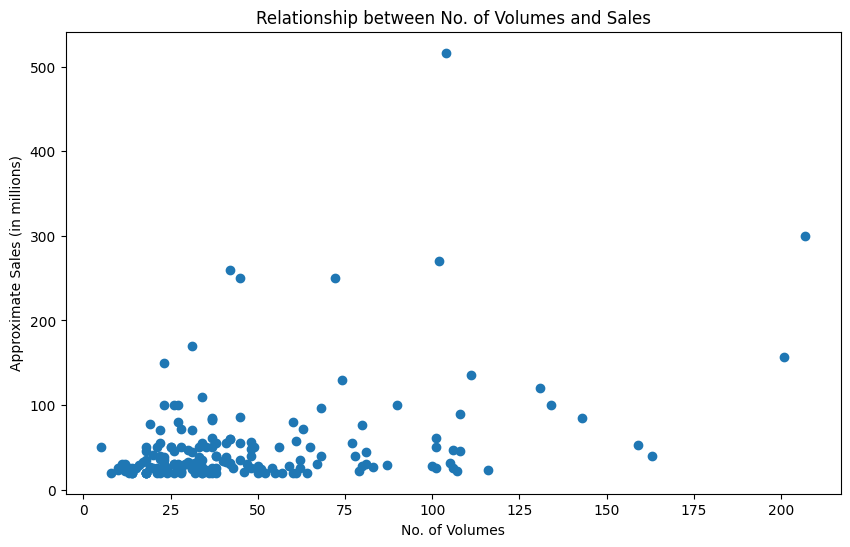

In [ ]:
#Hubungan antara Jumlah Volume dan Penjualan
plt.figure(figsize=(10, 6))
plt.scatter(df_file['No. of collected volumes'], df_file['Approximate sales in million(s)'])
plt.title('Relationship between No. of Volumes and Sales')
plt.xlabel('No. of Volumes')
plt.ylabel('Approximate Sales (in millions)')
plt.show()

Ada hubungan positif antara jumlah volume dan penjualan manga, yang artinya semakin banyak volume yang dikeluarkan, penjualannya cenderung naik juga. Tapi, tidak semua data mengikuti pola ini dengan tepat, ada beberapa data yang berbeda (outlier), yang artinya mereka berada di luar pola umum.

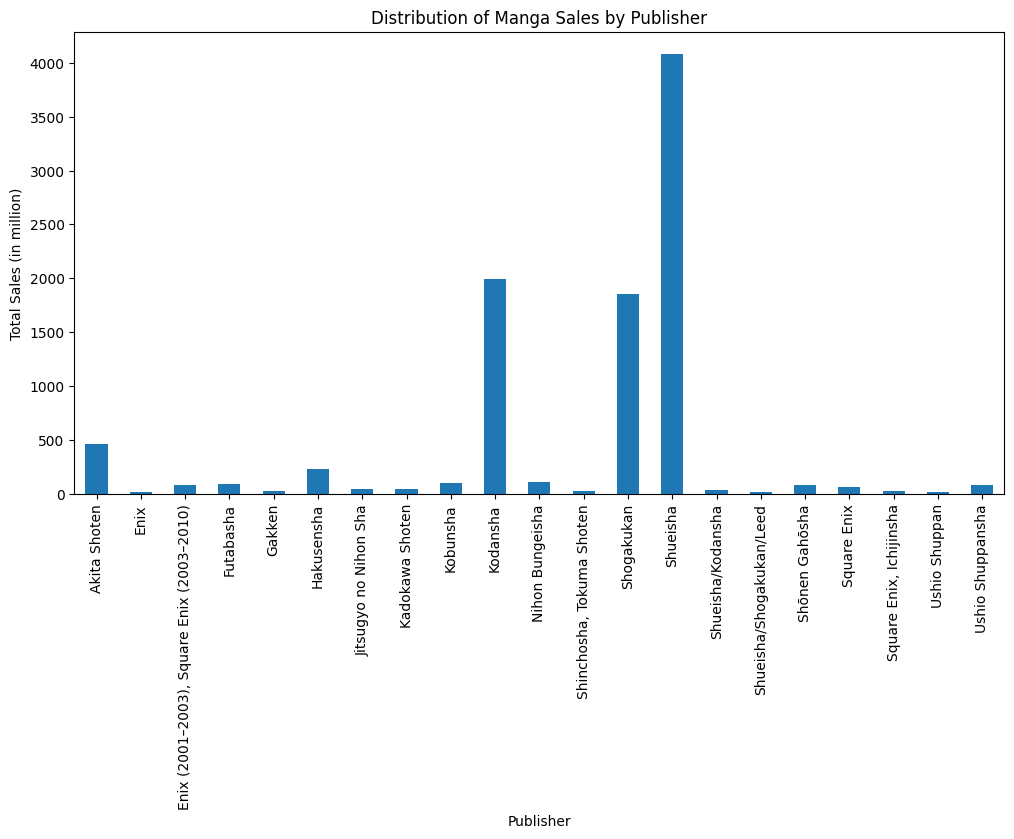

In [ ]:
#Distribusi Penjualan Manga per Penerbit
plt.figure(figsize=(12, 6))
publisher_sales = df_file.groupby('Publisher')['Approximate sales in million(s)'].sum()
publisher_sales.plot(kind='bar')
plt.title('Distribution of Manga Sales by Publisher')
plt.xlabel('Publisher')
plt.ylabel('Total Sales (in million)')
plt.xticks(rotation=90)
plt.show()

Tiga penerbit utama manga, yaitu Shueisha, Kodansha, dan Shogakukan, mendominasi pasar dengan penjualan yang jauh lebih tinggi dibandingkan penerbit lainnya, menunjukkan pangsa pasar yang besar dan peran penting dalam industri Manga. Penerbit lainnya memiliki pangsa pasar yang lebih kecil.

In [ ]:
px.imshow(df_file.corr(numeric_only=True))

1. - X: No. of collected volumes (Jumlah volume yang terkumpul)
   - Y: No. of collected volumes (Jumlah volume yang terkumpul)
   - Color: 1 (Warna tetap karena korelasi dengan dirinya sendiri)
   
   Ini artinya bahwa saat kita membandingkan jumlah volume yang terkumpul dengan dirinya sendiri, korelasinya selalu sempurna (1).

2. - X: Approximate sales in million(s) (Penjualan perkiraan dalam jutaan)
   - Y: No. of collected volumes (Jumlah volume yang terkumpul)
   - Color: 0.3856991
   
   Ini mengatakan bahwa ada korelasi positif (0.3856991) antara penjualan manga dalam jutaan dengan jumlah volume yang terkumpul. Artinya, semakin tinggi penjualan manga, semakin banyak volume yang terkumpul.

3. - X: Average sales per volume in million(s) (Rata-rata penjualan per volume dalam jutaan)
   - Y: No. of collected volumes (Jumlah volume yang terkumpul)
   - Color: -0.300739
   
   Di sini, ada korelasi negatif (-0.300739) antara rata-rata penjualan per volume manga dalam jutaan dengan jumlah volume yang terkumpul. Ini berarti, semakin tinggi rata-rata penjualan per volume, jumlah volume yang terkumpul semakin sedikit.

4. - X: No. of collected volumes (Jumlah volume yang terkumpul)
   - Y: Approximate sales in million(s) (Penjualan perkiraan dalam jutaan)
   - Color: 0.3856991
   
   Ini adalah korelasi yang sama seperti yang kedua, hanya saja variabel dipertukarkan. Jadi, hasilnya juga sama, yaitu penjualan manga yang lebih tinggi berkorelasi dengan jumlah volume yang lebih banyak.

5. - X: Approximate sales in million(s) (Penjualan perkiraan dalam jutaan)
   - Y: Approximate sales in million(s) (Penjualan perkiraan dalam jutaan)
   - Color: 1 (Warna tetap karena korelasi dengan dirinya sendiri)
   
   Ini seperti yang pertama, tetapi untuk penjualan manga. Jadi, korelasi antara penjualan manga dengan dirinya sendiri selalu sempurna (1).

6. - X: Average sales per volume in million(s) (Rata-rata penjualan per volume dalam jutaan)
   - Y: Approximate sales in million(s) (Penjualan perkiraan dalam jutaan)
   - Color: 0.5234103
   
   Ada korelasi positif yang cukup kuat (0.5234103) antara rata-rata penjualan per volume manga dan penjualan manga secara keseluruhan. Ini berarti jika penjualan per volume tinggi, penjualan manga secara keseluruhan juga cenderung tinggi.

7. - X: No. of collected volumes (Jumlah volume yang terkumpul)
   - Y: Average sales per volume in million(s) (Rata-rata penjualan per volume dalam jutaan)
   - Color: -0.300739
   
   Di sini, korelasi negatif (-0.300739) menunjukkan bahwa semakin banyak volume yang terkumpul, rata-rata penjualan per volume cenderung lebih rendah.

8. - X: Approximate sales in million(s) (Penjualan perkiraan dalam jutaan)
   - Y: Average sales per volume in million(s) (Rata-rata penjualan per volume dalam jutaan)
   - Color: 0.5234103
   
   Seperti yang keenam, ini menunjukkan korelasi positif antara penjualan manga secara keseluruhan dan rata-rata penjualan per volume manga. Jadi, jika penjualan manga tinggi, rata-rata penjualan per volume juga cenderung tinggi.

9. - X: Average sales per volume in million(s) (Rata-rata penjualan per volume dalam jutaan)
   - Y: Average sales per volume in million(s) (Rata-rata penjualan per volume dalam jutaan)
   - Color: 1 (Warna tetap karena korelasi dengan dirinya sendiri)
   
   Seperti yang pertama dan kelima, korelasi antara rata-rata penjualan per volume manga dengan dirinya sendiri selalu sempurna (1).

##**Verify Data Quality**

####Missing Values

In [ ]:
pd.DataFrame(df_file.isna().sum() / len(df_file) * 100, columns=['Null Ratio %'])

,Null Ratio %
Manga series,0.0
Author(s),0.0
Publisher,0.0
Demographic,0.0
No. of collected volumes,0.0
Serialized,0.0
Approximate sales in million(s),0.0
Average sales per volume in million(s),0.0


Semua kolom, seperti "Manga series", "Author(s)", "Publisher", "Demographic", "No. of collected volumes", "Serialized", "Approximate sales in million(s)", dan "Average sales per volume in million(s)", tidak memiliki nilai yang kosong. Yang berarti setiap kolom dalam dataset memiliki data yang lengkap tanpa kekurangan informasi.


####Outliers Values

In [ ]:
results = []

cols = df_file.select_dtypes(include=['float64', 'int64'])

for col in cols:
    q1 = df_file[col].quantile(0.25)
    q3 = df_file[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5*iqr
    upper_bound = q3 + 1.5*iqr
    outliers = df_file[(df_file[col] < lower_bound) | (df_file[col] > upper_bound)]
    percent_outliers = (len(outliers)/len(df_file))*100
    results.append({'Kolom': col, 'Persentase Outliers': percent_outliers})

results_df_file = pd.DataFrame(results)
results_df_file.set_index('Kolom', inplace=True)
results_df_file = results_df_file.rename_axis(None, axis=0).rename_axis('Kolom', axis=1)

display(results_df_file)


Kolom,Persentase Outliers
No. of collected volumes,6.417112
Approximate sales in million(s),10.695187
Average sales per volume in million(s),6.951872


- Kolom "No. of collected volumes" memiliki sekitar 6.42% data yang dianggap sebagai outliers.
- Kolom "Approximate sales in million(s)" memiliki sekitar 10.70% data yang dianggap sebagai outliers.
- Kolom "Average sales per volume in million(s)" memiliki sekitar 6.95% data yang dianggap sebagai outliers.

####Duplicated Values

In [ ]:
df_file[df_file.duplicated()]

,Manga series,Author(s),Publisher,Demographic,No. of collected volumes,Serialized,Approximate sales in million(s),Average sales per volume in million(s)


Tidak ada baris yang muncul, dikarenakan setiap baris dalam dataset adalah unik
(tidak ada nilai duplikat) atau tidak ada baris yang memiliki nilai yang sama persis di seluruh kolom dataset.

####Inconsistent Values / Noise (Optional)

In [ ]:
#Tambahkan kode untuk mengecek apakah ada nilai inkosisten/noise pada tiap kolom di dataset kalian ya (OPSIONAL)

Jangan lupa juga untuk berikan penjelasan di sini (OPSIONAL)